# 神经网络的实践

## TensorDataset 

TensorDataset在PyTorch中是一个非常有用的数据集类,它可以将tensors打包成数据集以供模型训练。

可以看到TensorDataset将输入的特征和标签打包成了数据集,可以用于后面的模型训练。

它的主要作用有:

- 将特征和标签组合成数据集

- 支持打包多个tensor,如图像、标签等

- 可以索引样例,方便读取

- 兼容 DataLoader,可以批量读取

TensorDataset使得tensor数据的组织和读取非常简洁高效。

## DataLoader

在PyTorch中,DataLoader是用于数据读取的重要类,其主要作用和用法示例如下:

1. 数据读取

DataLoader实现了对Dataset按batch读取,支持多进程读,自动转为GPU等功能:


2. 批处理

可以指定batch大小,将数据分成批进行读取:


3. 随机打乱

设置shuffle=True可以按epoch随机打乱数据:

4. 多进程加速

设置num_workers启动多进程读取数据:

5. 样本采样

可以通过Sampler自定义从数据集中采样样本:

总之,DataLoader提高了数据读取效率,是PyTorch中使用数据集的标准方式。

In [2]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
# 初始化特征和标签张量
features = torch.randn(100, 5) 
labels = torch.randint(0, 10, (100,))

# 用TensorDataset打包特征和标签
dataset = TensorDataset(features, labels)

# 创建数据加载器
dataloader = DataLoader(dataset, batch_size=8) # 分组

In [4]:
dataset[0]

(tensor([ 0.7577,  0.5329, -0.6535, -1.9601,  1.2337]), tensor(7))

In [7]:
for i in dataloader:
    print(i)
    break

[tensor([[ 0.7577,  0.5329, -0.6535, -1.9601,  1.2337],
        [ 0.2061, -1.7387, -1.0748,  0.9663,  0.1053],
        [ 0.1732, -0.9610, -1.3143,  0.1124,  1.4520],
        [-1.0634, -0.7739, -0.6780,  0.3464, -0.4883],
        [-0.2310, -0.2401, -0.8299, -1.1252,  0.9251],
        [ 2.4796,  0.7280,  0.1354,  0.4936, -0.4326],
        [ 0.6451, -1.6169, -0.3073, -1.0358,  0.1106],
        [-0.4788,  1.2845, -0.0115,  1.0770, -0.0441]]), tensor([7, 7, 6, 4, 8, 9, 3, 2])]


In [9]:
torch.randint(0, 10, (100,))

tensor([2, 3, 3, 2, 5, 0, 2, 0, 1, 1, 6, 9, 5, 0, 3, 8, 1, 5, 0, 8, 8, 8, 3, 1,
        1, 7, 8, 7, 6, 2, 7, 6, 9, 4, 0, 3, 6, 8, 6, 1, 4, 9, 4, 9, 8, 2, 3, 0,
        9, 1, 8, 5, 1, 2, 1, 6, 6, 9, 8, 2, 3, 4, 8, 5, 8, 1, 5, 6, 2, 7, 6, 2,
        0, 2, 4, 0, 6, 9, 8, 3, 8, 0, 5, 7, 0, 1, 1, 7, 2, 3, 8, 9, 9, 9, 1, 0,
        2, 6, 6, 4])

In [10]:
y = torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)

In [ ]:
class Model0(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super(Model0,self).__init__()
        self.h1=nn.Linear(3,3,bias=True)
        self.h2=nn.Linear(3,2,bias=True)
        self.out=nn.Linear(2,3,bias=True)

    def forward(self, x):
        h1_out=self.h1(x)
        h1_out_r=torch.relu(h1_out)
        h2_out=self.h2(h1_out_r)
        h2_out_r=torch.relu(h2_out)
        out_out=self.out(h2_out_r)
        #out_out_s=torch.softmax(out_out,dim=1)
        return out_out

## 多分类，二分类与回归的问题切换

nn.MSELoss()

nn.BCEWithLogitsLoss()

In [25]:
#定义神经网路的架构
class Model(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super(Model,self).__init__() #super(请查找这个类的父类，请使用找到的父类替换现在的类)
        self.linear1 = nn.Linear(in_features,50,bias=True) #输入层不用写，这里是隐藏层的第一层
        self.linear2 = nn.Linear(50,20,bias=True)
        self.output = nn.Linear(20,out_features,bias=True)

    def forward(self, x):
        z1 = self.linear1(x)
        z1_relu = torch.relu(z1)
        z2 = self.linear2(z1_relu)
        z2_relu = torch.relu(z2)
        z3 = self.output(z2_relu)
        #sigma3 = F.softmax(z3,dim=1)
        return z3
#实例化神经网络，调用优化算法需要的参数


! conda env list

In [50]:
#确定数据、确定优先需要设置的值
lr = 0.05
gamma = 0.99
epochs=5 #训练轮数
bs=50 #批量大小

torch.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32)
input_ = X.shape[1] #特征的数目

### 多分类

In [51]:
Y1= torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)# 0,1,2

data = TensorDataset(X,Y1)
batchdata = DataLoader(data, batch_size=bs, shuffle = True)

output_ = len(Y1.unique()) #分类的数目

net = Model(in_features=input_, out_features=output_)
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters() , lr=lr , momentum = gamma) #动量参数

In [52]:
for i in range(epochs):
    for batch_idx,(x,y) in enumerate(batchdata):
        #print(x,y)
        y = y.view(x.shape[0]).long()# 将y转换为与x的形状相同的张量，并转换为长整型
        z1 = net.forward(x)# 获取神经网络的前向传播结果
        loss = criterion(z1,y)# 计算损失函数
        opt.zero_grad()# 清空梯度
        loss.backward()# 反向传播
        opt.step()# 更新参数
        #if batch_idx % 10 == 0:
        print("epoch:{} , loss:{}".format(i,loss))

epoch:0 , loss:1.0926135778427124
epoch:0 , loss:1.1205637454986572
epoch:0 , loss:1.0785303115844727
epoch:0 , loss:1.1162126064300537
epoch:0 , loss:1.100728988647461
epoch:0 , loss:1.0945640802383423
epoch:0 , loss:1.1155763864517212
epoch:0 , loss:1.1171555519104004
epoch:0 , loss:1.1103758811950684
epoch:0 , loss:1.110683798789978
epoch:1 , loss:1.1076140403747559
epoch:1 , loss:1.0947024822235107
epoch:1 , loss:1.0953471660614014
epoch:1 , loss:1.0953882932662964
epoch:1 , loss:1.1167415380477905
epoch:1 , loss:1.1022541522979736
epoch:1 , loss:1.0928621292114258
epoch:1 , loss:1.1069389581680298
epoch:1 , loss:1.1299090385437012
epoch:1 , loss:1.1188290119171143
epoch:2 , loss:1.1062798500061035
epoch:2 , loss:1.0719668865203857
epoch:2 , loss:1.1502304077148438
epoch:2 , loss:1.1049830913543701
epoch:2 , loss:1.0817389488220215
epoch:2 , loss:1.0976811647415161
epoch:2 , loss:1.103011965751648
epoch:2 , loss:1.0909613370895386
epoch:2 , loss:1.0982497930526733
epoch:2 , loss:1.

### 二分类

In [39]:
Y2= torch.randint(low=0,high=2,size=(500,1),dtype=torch.float32)# 0,1

data = TensorDataset(X,Y2)
batchdata = DataLoader(data, batch_size=bs, shuffle = True)

output_ = 1 #分类的数目

net = Model(in_features=input_, out_features=output_)
criterion = nn.BCEWithLogitsLoss()
opt = optim.SGD(net.parameters() , lr=lr , momentum = gamma) #动量参数

In [40]:
for i in range(epochs):
    for batch_idx,(x,y) in enumerate(batchdata):
        #print(x,y)
        #y = y.view(x.shape[0]).long()# 将y转换为与x的形状相同的张量，并转换为长整型
        z1 = net.forward(x)# 获取神经网络的前向传播结果
        loss = criterion(z1,y)# 计算损失函数
        opt.zero_grad()# 清空梯度
        loss.backward()# 反向传播
        opt.step()# 更新参数
        #if batch_idx % 10 == 0:
        print("epoch:{} , loss:{}".format(i,loss))

epoch:0 , loss:0.6911578178405762
epoch:0 , loss:0.691813051700592
epoch:0 , loss:0.690122663974762
epoch:0 , loss:0.6907101273536682
epoch:0 , loss:0.7111401557922363
epoch:0 , loss:0.686767578125
epoch:0 , loss:0.6964631080627441
epoch:0 , loss:0.6999545097351074
epoch:0 , loss:0.6934158205986023
epoch:0 , loss:0.6942498683929443
epoch:1 , loss:0.6934919953346252
epoch:1 , loss:0.6932640075683594
epoch:1 , loss:0.6942868232727051
epoch:1 , loss:0.6935697793960571
epoch:1 , loss:0.6937231421470642
epoch:1 , loss:0.6928620338439941
epoch:1 , loss:0.6926438808441162
epoch:1 , loss:0.6917269825935364
epoch:1 , loss:0.6935970187187195
epoch:1 , loss:0.6929906606674194
epoch:2 , loss:0.694562554359436
epoch:2 , loss:0.6870779991149902
epoch:2 , loss:0.6932458281517029
epoch:2 , loss:0.6922366619110107
epoch:2 , loss:0.6948724985122681
epoch:2 , loss:0.7049015760421753
epoch:2 , loss:0.7011018991470337
epoch:2 , loss:0.6848878264427185
epoch:2 , loss:0.6940943002700806
epoch:2 , loss:0.6961

### 回归问题

### 分类问题
Y4= torch.randint(low=0,high=2,size=(500,1),dtype=torch.float32)# 0,1

data = TensorDataset(X,Y4)
batchdata = DataLoader(data, batch_size=bs, shuffle = True)

output_ = 2 #分类的数目

net = Model(in_features=input_, out_features=output_)
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters() , lr=lr , momentum = gamma) #动量参数
for i in range(epochs):
    for batch_idx,(x,y) in enumerate(batchdata):
        #print(x,y)
        #y = y.view(x.shape[0]).long()# 将y转换为与x的形状相同的张量，并转换为长整型
        z1 = net.forward(x)# 获取神经网络的前向传播结果
        loss = criterion(z1,y)# 计算损失函数
        opt.zero_grad()# 清空梯度
        loss.backward()# 反向传播
        opt.step()# 更新参数
        #if batch_idx % 10 == 0:
        print("epoch:{} , loss:{}".format(i,loss))

In [34]:
Y3= torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)# 0,1,2

data = TensorDataset(X,Y3)
batchdata = DataLoader(data, batch_size=bs, shuffle = True)

output_ = 1 #分类的数目

net = Model(in_features=input_, out_features=output_)
criterion = nn.MSELoss()
opt = optim.SGD(net.parameters() , lr=lr , momentum = gamma) #动量参数

for i in range(epochs):
    for batch_idx,(x,y) in enumerate(batchdata):
        #print(x,y)
        #y = y.view(x.shape[0]).long()# 将y转换为与x的形状相同的张量，并转换为长整型
        z1 = net.forward(x)# 获取神经网络的前向传播结果
        loss = criterion(z1,y)# 计算损失函数
        opt.zero_grad()# 清空梯度
        loss.backward()# 反向传播
        opt.step()# 更新参数
        #if batch_idx % 10 == 0:
        print("epoch:{} , loss:{}".format(i,loss))

epoch:0 , loss:1.4053595066070557
epoch:0 , loss:1.0177218914031982
epoch:0 , loss:0.6129891872406006
epoch:0 , loss:0.9005482196807861
epoch:0 , loss:1.2485594749450684
epoch:0 , loss:0.6408024430274963
epoch:0 , loss:0.7605299949645996
epoch:0 , loss:0.6591443419456482
epoch:0 , loss:0.7288278341293335
epoch:0 , loss:0.6772197484970093
epoch:1 , loss:0.784960150718689
epoch:1 , loss:0.6220266819000244
epoch:1 , loss:0.7043445706367493
epoch:1 , loss:0.680854320526123
epoch:1 , loss:0.5799904465675354
epoch:1 , loss:0.5838422179222107
epoch:1 , loss:0.5871711373329163
epoch:1 , loss:0.7500452995300293
epoch:1 , loss:0.7635473012924194
epoch:1 , loss:0.6356462240219116
epoch:2 , loss:0.6441958546638489
epoch:2 , loss:0.7051577568054199
epoch:2 , loss:0.8322952389717102
epoch:2 , loss:0.8388717174530029
epoch:2 , loss:0.6928207278251648
epoch:2 , loss:0.6954209208488464
epoch:2 , loss:0.7269460558891296
epoch:2 , loss:0.5530810356140137
epoch:2 , loss:0.503537654876709
epoch:2 , loss:0.

# 基于真实数据的神经网络模型构建

torch.max(sigma,1)[1]

torch.sum(r1 == y)

x.view(-1, 28*28)

In [53]:
mnist = torchvision.datasets.FashionMNIST(root='D:\jupyterDate\python_data_course\data_course\机器学习与深度学习导论\data\FashionMNIST', train=True, download=True, transform=transforms.ToTensor())

100.0%


Extracting D:\jupyterDate\python_data_course\data_course\机器学习与深度学习导论\data\FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to D:\jupyterDate\python_data_course\data_course\机器学习与深度学习导论\data\FashionMNIST\FashionMNIST\raw



100.0%


Extracting D:\jupyterDate\python_data_course\data_course\机器学习与深度学习导论\data\FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to D:\jupyterDate\python_data_course\data_course\机器学习与深度学习导论\data\FashionMNIST\FashionMNIST\raw



100.0%


Extracting D:\jupyterDate\python_data_course\data_course\机器学习与深度学习导论\data\FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to D:\jupyterDate\python_data_course\data_course\机器学习与深度学习导论\data\FashionMNIST\FashionMNIST\raw



100.0%

Extracting D:\jupyterDate\python_data_course\data_course\机器学习与深度学习导论\data\FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to D:\jupyterDate\python_data_course\data_course\机器学习与深度学习导论\data\FashionMNIST\FashionMNIST\raw



In [60]:
mnist[1][1]

0

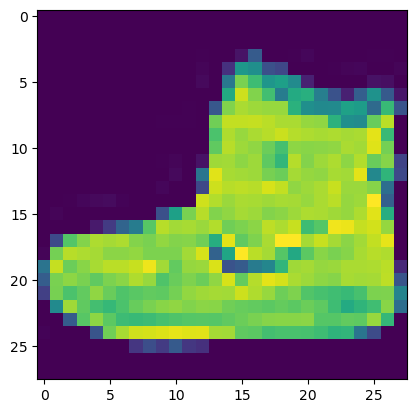

In [55]:
plt.imshow(mnist[0][0].view((28, 28)).numpy())

In [62]:
#mnist.targets
#mnist.data.shape
mnist[0][0].view(-1, 28*28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0

In [63]:
#定义神经网路的架构
class Model_mnist(nn.Module):
    def __init__(self,in_features=10,out_features=2):
        super().__init__() 
        self.linear1 = nn.Linear(in_features,128)
        self.output = nn.Linear(128,out_features)

    def forward(self, x):
        x = x.view(-1, 28*28)# 垃圾处理
        sigma1 = torch.relu(self.linear1(x))
        z2 = self.output(sigma1)
        return z2

In [64]:
#确定数据、确定优先需要设置的值
lr = 0.1
gamma = 0.5
epochs=5 #训练轮数
bs=5000 #批量大小

dataloader = DataLoader(mnist, batch_size=bs, shuffle=True)

input_ = 28*28 #特征的数目
output_ = len(mnist.targets.unique()) #分类的数目

torch.manual_seed(420)
net = Model_mnist(in_features=input_, out_features=output_)
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters() , lr=lr , momentum = gamma) #动量参数

In [68]:
for i in range(epochs):
    for batch_idx,(x,y) in enumerate(dataloader):
        #print(x,y)
        y = y.view(x.shape[0]).long()# 将y转换为与x的形状相同的张量，并转换为长整型
        z1 = net.forward(x)# 获取神经网络的前向传播结果
        loss = criterion(z1,y)# 计算损失函数
        opt.zero_grad()# 清空梯度
        loss.backward()# 反向传播
        opt.step()# 更新参数
        if batch_idx % 10 == 0:
            z2=torch.max(z1,1)[1]
            print("epoch:{} , loss:{}, zhunquelv:{}".format(i,loss,torch.sum(z2 == y)/bs))

epoch:0 , loss:0.6486598253250122, zhunquelv:0.7739999890327454
epoch:0 , loss:0.6144958734512329, zhunquelv:0.7892000079154968
epoch:1 , loss:0.6177963018417358, zhunquelv:0.7901999950408936
epoch:1 , loss:0.6215616464614868, zhunquelv:0.7746000289916992
epoch:2 , loss:0.6037749648094177, zhunquelv:0.7753999829292297
epoch:2 , loss:0.5673689246177673, zhunquelv:0.807200014591217
epoch:3 , loss:0.5613701343536377, zhunquelv:0.8148000240325928
epoch:3 , loss:0.5492792725563049, zhunquelv:0.8166000247001648
epoch:4 , loss:0.5678409934043884, zhunquelv:0.8008000254631042
epoch:4 , loss:0.5521474480628967, zhunquelv:0.8162000179290771


In [41]:
mnist.data[0].shape

torch.Size([28, 28])

In [78]:
#mnist.data[0]